# **Linear regression**

Linear regression is to find a relationship between X (independent / explanatory variable)  and Y (dependent / response variable). For example, weight (X) and height (Y), which can be formulate as: $ Y = wX + b $. In this formula, a is coefficient and b is intercept.  
  
Here we create 2 arrays with 10 people's weight and height.

In [1]:
import numpy as np

X = np.array([40, 75, 72, 54, 47, 62, 66, 57, 78, 80])
Y = np.array([150, 171, 178, 163, 160, 168, 175, 160, 180, 178])

Plot weight and height first to see is there any correlation between these 2 arrays.

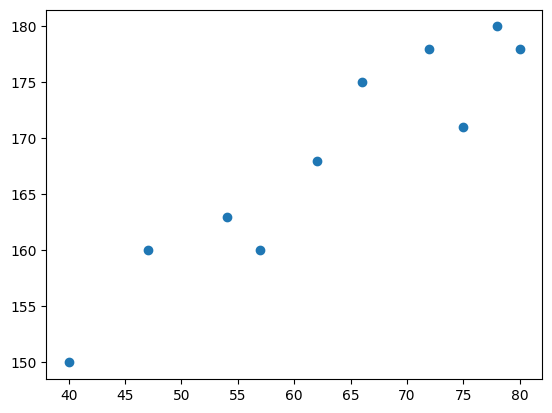

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

We can see that weight and hwieght have *positive* correlation and seemly  are almost on the same straight line (but exactly not).  
  
Then how we can said that a line can represent the relation between weight and height? Here we define a loss function as:  
  
$$ Loss(w, b) = {1 \over n}\sum_{i}^{n} (Y_i^{act} - Y_i^{pred})^2 $$   
$$ where \quad Y_i^{pred} = wX_i+b$$  
  
The loss function here means that the vertical distance from each dot to the line, so the w, b combination with  the minimum value of loss function can be the best lien to represent the correlation.

Okay, here we get another problem, how to get the a, b combination that with the most minor loss?  
  
The answer is to use gradient descent. Gradient descent is making use of derivative keep updating the parameters until derivative equals 0, which means  
$$ w = w - \alpha {{\partial{Loss}} \over {\partial w}} $$
$$ b = b - \alpha {{\partial{Loss}} \over {\partial b}} $$
  
$\alpha$ here represent *learning rate*
  
Firstly, we take partial derivative with respect to $a$:  
$$ {{\partial{Loss}} \over {\partial w}} = {1 \over n} \sum_{i}^{n} 2 (Y_i^{act} - (a*X_i+b))(-X_i) $$
$$ {{\partial{Loss}} \over {\partial w}} = {-2 \over n} \sum_{i}^{n} X_i(Y_i^{act} - Y_i^{pred}) $$
  
Then also take partial derivative with respect to $b$:  
$$ {{\partial{Loss}} \over {\partial b}} = {-2 \over n} \sum_{i}^{n} 2 (Y_i^{act} - Y_i^{pred}) $$


So, by code we can write as follow,


In [ ]:
# initalize w, b and learning rate
w = 0
b = 0
lr = 0.0002
epochs = 300000
n = len(X)

prev_rmse = 0
rmse = 1
i = 0
while abs(prev_rmse - rmse) > 0.0001:
    prev_rmse = rmse
    Y_pred = w * X + b
    error = Y - Y_pred
    D_w = -2/n * np.sum(X * error)
    D_b = -2/n * np.sum(error)
    w = w - lr * D_w
    b = b - lr * D_b
    rmse = np.sqrt(np.sum(error**2))
    if i % 2000 == 0:
        print(f'Epoch: {i}, w: {w}, b: {b}, error: {rmse}')
    i += 1

Epoch: 0, a: 4.293160000000001, b: 0.06732, error: 533.0356460875764
Epoch: 2000, a: 2.5280713104135546, b: 3.9591131074882413, error: 77.0692806352301
Epoch: 4000, a: 2.470323174025077, b: 7.754071880919992, error: 74.69610976292773
Epoch: 6000, a: 2.414384930183369, b: 11.430092312287716, error: 72.39865888941544
Epoch: 8000, a: 2.3601998547889953, b: 14.990902065067356, error: 70.17459578349606
Epoch: 10000, a: 2.3077130015405736, b: 18.44011197350459, error: 68.02166239027483
Epoch: 12000, a: 2.2568711462165645, b: 21.781219704175744, error: 65.93767251851109
Epoch: 14000, a: 2.2076227327033147, b: 25.01761330279228, error: 63.920509598786815
Epoch: 16000, a: 2.1599178207146563, b: 28.15257462984336, error: 61.9681245100516
Epoch: 18000, a: 2.1137080351500224, b: 31.189282688562606, error: 60.078533472159805
Epoch: 20000, a: 2.0689465170397487, b: 34.13081684859139, error: 58.249816002074866
Epoch: 22000, a: 2.025587876027792, b: 36.980159968609925, error: 56.48011293146568
Epoch: 

Here we get the coefficient $a=2.57$ and intercept $b=0.93$, then we can also plot the dot and line in one chart.

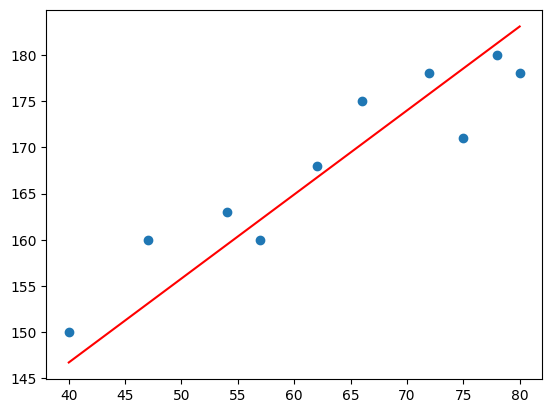

In [ ]:
Y_pred = w * X + b

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

Gradient descent is usually used method to find the best fit parameter in machine learning. So far you may have some questions, one is that why we defined the loss function as mean square error? Which is because derivate is used in gradient descent, and it is easier the get derivate for square than other, i.e absolute distance.

Another question might have is, can there are multiple X or non-linear formula? The answer is yes!  
In case of multiple X, her will have multiple coefficient for each X, then we need to get derivate with respect to each coefficient and intercept, lastly updating them as the same method.  
In case of non-linear formula, we can make not power of one as another X. Take the same weight and height problem as example, if we formulate the relation as:  
$$ Y = w_1X^2+w_2X+b $$  
, which is a quadratic equation. We can also not think this as quadratic equation, can alos be:
$$ Y = w_1X_1+w_2X_2+b $$  
where $X_2$ is the original weight, and $X_1$ is the power of 2 $X^2$


In [ ]:
X1 = X**2
X2 = X

# initalize a, b and learning rate
w1 = 0
w2 = 0
b = 0
lr = 0.000002
epochs = 300000
n = len(X1)

prev_rmse = 0
rmse = 1
i = 0
while abs(prev_rmse - rmse) > 0.000001:
    prev_rmse = rmse
    Y_pred = w1 * X2 + w2 * X1 + b
    error = Y - Y_pred
    D_w1 = -2/n * np.sum(X2 * error)
    D_w2 = -2/n * np.sum(X1 * error)
    D_b = -2/n * np.sum(error)
    w1 = w1 - lr * D_w1
    w2 = w2 - lr * D_w2
    b = b - lr * D_b
    rmse = np.sqrt(np.sum(error**2))
    if i % 2000 == 0:
        print(f'Epoch: {i}, w1: {w1}, w2: {w2}, b: {b}, error: {rmse}')
    i += 1


Epoch: 0, a: 0.04293160000000001, b: 2.3433449540444255e-06, c: 0.0006732, error: 533.0356460875764
Epoch: 2000, a: 0.037999578437339636, b: 0.0046890332530431286, c: 0.08344721129583886, error: 165.565572068012
Epoch: 4000, a: 0.037912090455241236, b: 0.009375723161132393, c: 0.16616716504057807, error: 165.31463079315725
Epoch: 6000, a: 0.03782463052432565, b: 0.014062413069221657, c: 0.24876184521313083, error: 165.06383355834308
Epoch: 8000, a: 0.037737198628558184, b: 0.01874910297730861, c: 0.33123132342289124, error: 164.81318028936002
Epoch: 10000, a: 0.03764979475191325, b: 0.023435792885394404, c: 0.413575671238322, error: 164.56267091208113
Epoch: 12000, a: 0.03756241887837442, b: 0.0281224827934802, c: 0.4957949601869727, error: 164.3123053524622
Epoch: 14000, a: 0.03747507099193442, b: 0.0328091727015683, c: 0.5778892617555076, error: 164.06208353654188
Epoch: 16000, a: 0.037387751076595116, b: 0.037495862609661035, c: 0.6598586473897278, error: 163.81200539044184
Epoch: 1

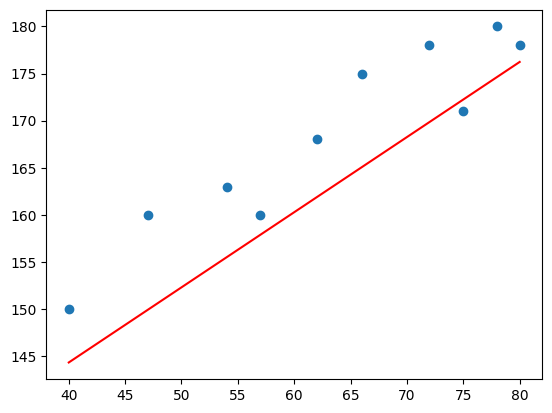

In [ ]:
Y_pred = w1 * X1 + w2 * X2 + b

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

From the plot can see that the line is almost the same as linear one, so weight and height are fitter to linear model than quadratic one. This is also can tell from the inital scatter plot.

In [ ]:
from typing import Tuple, List
import numpy as np
class LinearRegression:
    def __init__ (self, lr: float = 0.01, epochs: int = 1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X: np.array, Y: np.array) -> Tuple[List, float]:
        self.X = X
        self.Y = Y
        if X.ndim == 1:
            self.n_features = 1
            self.X = X.reshape(-1, len(X))
        else:
            self.n_features = len(X.T)
            self.X = X
        self.w = np.zeros(self.n_features)
        self.b = 0
        prev_rmse = 0
        rmse = 1
        i = 0
        while abs(prev_rmse - rmse) > 0.000001:
            prev_rmse = rmse
            Y_pred = self.w.dot(self.X) + self.b
            error = self.Y - Y_pred
            D_w = -2/self.n_features * np.sum(X * error)
            D_b = -2/self.n_features * np.sum(error)
            self.w = self.w - self.lr * D_w
            self.b = self.b - self.lr * D_b
            rmse = np.sqrt(np.sum(error**2))
            i += 1
        return self.w, self.b
    
    def predict(self, X: np.array) -> np.array:
        return self.w.dot(X) + self.b



In [ ]:
X = np.array([40, 75, 72, 54, 47, 62, 66, 57, 78, 80])
Y = np.array([150, 171, 178, 163, 160, 168, 175, 160, 180, 178])

regression = LinearRegression(lr=0.000002)
w, b = regression.fit(X,Y)

In [ ]:
X = np.array(np.stack([np.linspace(-10,10,30),np.linspace(-5,8,30)]),dtype = float)
Y = np.array([5,3]).dot(X) + 8
regression = LinearRegression(lr=0.00002)
w, b = regression.fit(X,Y)

(array([4.21212601, 4.21212601]), 6.181503721995714)

In [79]:
regression.X[0]

array([-10.        ,  -9.31034483,  -8.62068966,  -7.93103448,
        -7.24137931,  -6.55172414,  -5.86206897,  -5.17241379,
        -4.48275862,  -3.79310345,  -3.10344828,  -2.4137931 ,
        -1.72413793,  -1.03448276,  -0.34482759,   0.34482759,
         1.03448276,   1.72413793,   2.4137931 ,   3.10344828,
         3.79310345,   4.48275862,   5.17241379,   5.86206897,
         6.55172414,   7.24137931,   7.93103448,   8.62068966,
         9.31034483,  10.        ])